<a href="https://colab.research.google.com/github/Hyro9533/sharing-code/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP Outils Logiciels 2**

*Intégration Numérique*

---

Edité par MONTGUILLON Jonathan TP4.

<img src = "http://www.stillincontact.com/images/ecoles/10792.jpg">

Définissions la fonction commune : 

In [119]:
!pip install colorama
import colorama
from colorama import init, Fore, Back, Style

''' 
Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
Style: DIM, NORMAL, BRIGHT, RESET_ALL
'''

def functionOriginal(x):
    return 1/x

def functionOriginalPrinter():
    return "1/x"

def errorCalcul(origin,calculate):
    return abs((origin - calculate)/(origin)) * 100

def jumpPrinter(loop,reset):
    if reset:
        resetPrinter()
    for k in range(loop):
        print("\n")
    return 

def resetPrinter():
    return print(Style.RESET_ALL)

from scipy.integrate import quad 	

import numpy as np
import matplotlib.pyplot as plt

jumpPrinter(1,True)
print(Back.GREEN + Fore.BLACK +"Tous les calculs seront arrondies à 10**-4.")
resetPrinter()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



Tous les calculs seront arrondies à 10**-4.



Ainsi que ses bornes

In [120]:
print(Back.RED + Fore.WHITE + "Merci d'entrer un entier positif ou négatif, pour les 2 variables suivantes !")
jumpPrinter(1,True)
print(Back.BLACK)

borneA = 'a'
while(borneA.lstrip('-').isdigit() == False):
    borneA = (input("- Entrez la borne 'a' : "))
borneA = int(borneA)

borneB = 'b'
while(borneB.lstrip('-').isdigit() == False):
    borneB = (input("- Entrez la borne 'a' : ")) 
borneB = int(borneB)

jumpPrinter(2,True)
print(Style.BRIGHT + Fore.YELLOW + "Les bornes sont respectivement : ",borneA," & ",borneB," .")
resetPrinter()

Merci d'entrer un entier positif ou négatif, pour les 2 variables suivantes !




- Entrez la borne 'a' : 1
- Entrez la borne 'a' : 4





Les bornes sont respectivement :  1  &  4  .



Calculons son intégrale via une librairie :

In [121]:
print(Style.BRIGHT + Fore.BLACK +"Fonction Entrée : ",functionOriginalPrinter(), " avec les bornes A et B respectivement : ",borneA, " & ",borneB)

functionIntegrate,calculError = quad(functionOriginal, borneA, borneB) 

jumpPrinter(1,True)
print(Fore.BLUE + "Fonction Intégrée : ", round(functionIntegrate,4))
resetPrinter()

Fonction Entrée :  1/x  avec les bornes A et B respectivement :  1  &  4



Fonction Intégrée :  1.3863



Traçons sa représentation

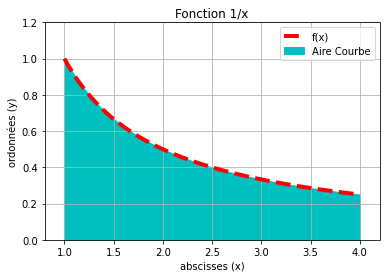

In [122]:
plt.grid()
plt.plot(np.linspace (borneA , borneB , 100) , functionOriginal(np.linspace (borneA , borneB , 100)) ,"r--",linewidth= "4" ) # courbe trac ée en rouge
plt.xlabel("abscisses (x)") # mettre un nom à l’axe des abscisses
plt.ylabel("ordonnées (y)") # mettre un nom à l’axe des ordonn ées
plt.title("Fonction 1/x") # mettre un titre à la figure
plt.xlim(borneA-0.2,borneB+0.2)
plt.ylim(0,1.2)
plt.fill_between(np.linspace (borneA , borneB , 100),functionOriginal(np.linspace (borneA , borneB , 100)),0,color='c')
plt.legend(["f(x)", "Aire Courbe"]) # donne une lé gende au graphique
plt.show()

Choissisons le nombre de forme à représenter sous la courbe :

In [123]:
print(Back.RED + Fore.WHITE + "Merci d'entrer un entier positif, pour l'unique variable suivante !")
jumpPrinter(1,True)
print(Back.BLACK)

nbrForme = 'a'
while(nbrForme.isdigit() == False):
    nbrForme = (input("- Entrez le nombre de forme : "))
nbrForme = int(nbrForme)

Δ = (borneB-borneA) / nbrForme

jumpPrinter(2,True)
print(Style.BRIGHT + Fore.YELLOW + "Le nombre de forme est de : ",nbrForme," .")
print(Style.BRIGHT + Fore.YELLOW + "Le pas est de : ",Δ," .")
resetPrinter()

Merci d'entrer un entier positif, pour l'unique variable suivante !




- Entrez le nombre de forme : 6





Le nombre de forme est de :  6  .
Le pas est de :  0.5  .



___**Méthode des Rectangles**___


---
<ul type="square">
Soit la fonction suivante :

<li>$$
f(x) = \frac{1}{x}
$$
Et sa primitive :
<li>$$
F = \int_a^b f(x) \;dx
$$
<li>$$
F = \int_a^b \frac{1}{x} \;dx
$$

```
- Les bornes devront être choisies par le client, ainsi que le nombre de formes à transmettre.
```
Illustration de la méthode :
<img src="https://i.ibb.co/rbDrcKr/rect-bas.png">
<img src="https://i.ibb.co/WPZhjS1/rec-haut.png">


In [129]:
calculIntegrateUpRectangle = 0

print("Rectangle du Haut : \n")
for k in range(nbrForme):
    print("Rectangle",k+1)
    print("Calcul : Δ * f(sommet Rectangle) => ",Δ," x ", "f(", round(borneA+(Δ*k),2),")", " = ", Δ*round(f(borneA+(Δ*k)),2))

    calculIntegrateUpRectangle += (Δ * functionOriginal(borneA+(Δ*k) ))

calculIntegrateDownRectangle = 0

print("\n\n\n\nRectangle du Bas :\n")
for k in range(nbrForme):

    print("Rectangle",k+1)
    print("Calcul : Δ * f(sommet Rectangle) => ",Δ," x ", "f(", round(borneA+(Δ*(k+1)),2),")", " = ", Δ*round(f(borneA+(Δ*(k+1))),2))
    calculIntegrateDownRectangle += (Δ * functionOriginal(borneA+(Δ*(k+1)) ))
   

jumpPrinter(2,False)
print("Calcul Intégrée (Rectangle du Bas) : ", round(calculIntegrateDownRectangle,4))
print("Calcul Intégrée (Rectangle du Haut) : ", round(calculIntegrateUpRectangle,4))

print("Fonction Intégrée : ", round(functionIntegrate,4))
jumpPrinter(3,False)

print("Erreur (Rectangle du Bas) : ", round(errorCalcul(functionIntegrate,calculIntegrateDownRectangle),4)," %.")
print("Erreur (Rectangle du Haut) : ", round(errorCalcul(functionIntegrate,calculIntegrateUpRectangle),4)," %.")


Rectangle du Haut : 

Rectangle 1
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 1.0 )  =  0.5
Rectangle 2
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 1.5 )  =  0.335
Rectangle 3
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 2.0 )  =  0.25
Rectangle 4
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 2.5 )  =  0.2
Rectangle 5
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 3.0 )  =  0.165
Rectangle 6
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 3.5 )  =  0.145




Rectangle du Bas :

Rectangle 1
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 1.5 )  =  0.335
Rectangle 2
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 2.0 )  =  0.25
Rectangle 3
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 2.5 )  =  0.2
Rectangle 4
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 3.0 )  =  0.165
Rectangle 5
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 3.5 )  =  0.145
Rectangle 6
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 4.0 )  =  0.125




Calcul Intégrée (Rectangle du Bas) :  1.2179
C

___**Méthode des Trapèzes**___


---
<ul type="square">
Soit la fonction suivante :

<li>$$
f(x) = \frac{1}{x}
$$
Et sa primitive :
<li>$$
F = \int_a^b f(x) \;dx
$$
<li>$$
F = \int_a^b \frac{1}{x} \;dx
$$

```
- Les bornes devront être choisies par le client, ainsi que le nombre de formes à transmettre.
```
Illustration de la méthode :

<img src="https://i.ibb.co/j4zsZVx/trapeze.png">

In [130]:
calculIntegrateTrapeze = 0

print("Trapèze :\n")
for k in range(nbrForme):

    print("Trapèze",k+1)
    print("Calcul :  f(Petit Côté) + f(Grand Côté)  => ","f(", round(borneA+(Δ*k),2),")", '+'  ,"f(", round(borneA+(Δ*(k+1)),2),")"," = ", round(f(borneA+(Δ*k)) + f(borneA+(Δ*(k+1))),2))
    calculIntegrateTrapeze +=  functionOriginal(borneA+(Δ*k)) + functionOriginal(borneA+(Δ*(k+1)))
   
print("\n")
print("Calcul : Sommes des Aires * Δ / 2 => ", round(calculIntegrateTrapeze,2) , " * ", Δ , " / ", " 2 ", " = ", calculIntegrateTrapeze * (Δ/2) )
calculIntegrateTrapeze *= (Δ/2)

jumpPrinter(2,False)
print("Calcul Intégrée (Trapèze) : ", round(calculIntegrateTrapeze,4))

print("Fonction Intégrée : ", round(functionIntegrate,4))
jumpPrinter(3,False)


print("Erreur (Trapèze) : ", round(errorCalcul(functionIntegrate,calculIntegrateTrapeze),4)," %.")

Trapèze :

Trapèze 1
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 1.0 ) + f( 1.5 )  =  1.67
Trapèze 2
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 1.5 ) + f( 2.0 )  =  1.17
Trapèze 3
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 2.0 ) + f( 2.5 )  =  0.9
Trapèze 4
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 2.5 ) + f( 3.0 )  =  0.73
Trapèze 5
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 3.0 ) + f( 3.5 )  =  0.62
Trapèze 6
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 3.5 ) + f( 4.0 )  =  0.54


Calcul : Sommes des Aires * Δ / 2 =>  5.62  *  0.5  /   2   =  1.4053571428571427




Calcul Intégrée (Trapèze) :  1.4054
Fonction Intégrée :  1.3863






Erreur (Trapèze) :  1.3751  %.


___**Méthode des Simpson**___


---
<ul type="square">
Soit la fonction suivante :

<li>$$
f(x) = \frac{1}{x}
$$
Et sa primitive :
<li>$$
F = \int_a^b f(x) \;dx
$$
<li>$$
F = \int_a^b \frac{1}{x} \;dx
$$

```
- Les bornes devront être choisies par le client, ainsi que le nombre de formes à transmettre.
```
Illustration de la méthode :

<img src="https://www.researchgate.net/profile/Sofyane-Bouameur/publication/341165012/figure/fig3/AS:887943052935171@1588713529989/la-methode-de-Simpson.jpg">

In [141]:
calculIntegrateSimpson = 0

#https://zestedesavoir.com/tutoriels/472/calcul-approche-dintegrales/la-methode-de-simpson/

def simpson(f, a, b, n,pas):

    somme = (f(a) + f(b)) / 2 + 2 * f(a + pas / 2)  # On initialise la somme


    for i in range(n-1): # On calcule la somme n-1 fois

        print("Calcul : f(",borneA+(pas*(i+1)),") + 2* f(",borneA+(pas*(i+1)) + pas / 2,")")
        somme += f(borneA+(pas*(i+1))) + 2 * f(borneA+(pas*(i+1)) + pas / 2)
    

    ''' x = a + pas           # La somme commence à x+1 
    for i in range(n-1): # On calcule la somme n-1 fois


        print("Calcul : f(",x,") + 2* f(",x + pas / 2,")")
        #somme += f(x) + 2 * f(x + pas / 2)
        x += pas
     '''

    return somme * pas / 3   # On retourne cette somme fois le pas / 3   

calculIntegrateSimpson = simpson(functionOriginal,borneA ,borneB , nbrRectangle,Δ)

jumpPrinter(2,False)
print("Calcul Intégrée (Simpson) : ", round(calculIntegrateSimpson,4))

print("Fonction Intégrée : ", round(functionIntegrate,4))
jumpPrinter(3,False)

print("Erreur (Trapèze) : ", round(errorCalcul(functionIntegrate,calculIntegrateSimpson),4)," %.")

Calcul : f( 1.5 ) + 2* f( 1.75 )
Calcul : f( 2.0 ) + 2* f( 2.25 )
Calcul : f( 2.5 ) + 2* f( 2.75 )
Calcul : f( 3.0 ) + 2* f( 3.25 )
Calcul : f( 3.5 ) + 2* f( 3.75 )




Calcul Intégrée (Simpson) :  1.3864
Fonction Intégrée :  1.3863






Erreur (Trapèze) :  0.0082  %.


Binomial

In [127]:
print("WIP")

WIP
